In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("measurements.csv")
data.head()

distance consume  speed temp_inside  temp_outside specials gas_type  AC  \
0       28       5     26        21,5            12      NaN      E10   0   
1       12     4,2     30        21,5            13      NaN      E10   0   
2     11,2     5,5     38        21,5            15      NaN      E10   0   
3     12,9     3,9     36        21,5            14      NaN      E10   0   
4     18,5     4,5     46        21,5            15      NaN      E10   0   

   rain  sun refill liters refill gas  
0     0    0            45        E10  
1     0    0           NaN        NaN  
2     0    0           NaN        NaN  
3     0    0           NaN        NaN  
4     0    0           NaN        NaN

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [4]:
# dropping Null values parameters
dropped_data = data.drop(['refill liters','refill gas','specials'],axis = 1)

In [5]:
dropped_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   distance      388 non-null    object
 1   consume       388 non-null    object
 2   speed         388 non-null    int64 
 3   temp_inside   376 non-null    object
 4   temp_outside  388 non-null    int64 
 5   gas_type      388 non-null    object
 6   AC            388 non-null    int64 
 7   rain          388 non-null    int64 
 8   sun           388 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 27.4+ KB


In [6]:
dropped_data.head()

distance consume  speed temp_inside  temp_outside gas_type  AC  rain  sun
0       28       5     26        21,5            12      E10   0     0    0
1       12     4,2     30        21,5            13      E10   0     0    0
2     11,2     5,5     38        21,5            15      E10   0     0    0
3     12,9     3,9     36        21,5            14      E10   0     0    0
4     18,5     4,5     46        21,5            15      E10   0     0    0

In [7]:
def delete_comma_and_convert_float(df,column_name):
    
    index = df.columns.get_loc(column_name)
    
    for i in range(len(df[column_name])):
        value = df.iloc[i,index]
        value_list = value.split(',')
        
        if len(value_list) == 2:
            new_value = float(''.join(value_list)) / 10
            df.iloc[i,index] = new_value
            
        else :
            df.iloc[i,index] = float (value)    

In [8]:
delete_comma_and_convert_float(dropped_data, 'distance')
dropped_data['distance'] = dropped_data['distance'].astype(float)
delete_comma_and_convert_float(dropped_data, 'consume')
dropped_data['consume'] = dropped_data['consume'].astype(float)

In [9]:
dropped_data['gas_type'] = dropped_data['gas_type'].map({'SP98': 1, 'E10': 0})  # change 'gas_type' values to 1 and 0. String to int

In [10]:
new_df = dropped_data[['distance','speed','temp_outside','gas_type','rain','sun','consume']]
sorted_df = new_df = new_df.sort_values('consume')
dataset_x = sorted_df.drop(['consume'],axis=1)
dataset_y = sorted_df.consume.values

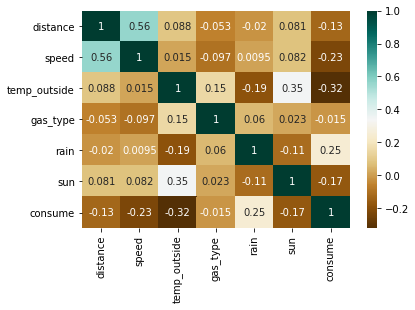

In [11]:
sns.heatmap(new_df.corr(),cmap = 'BrBG', annot=True)

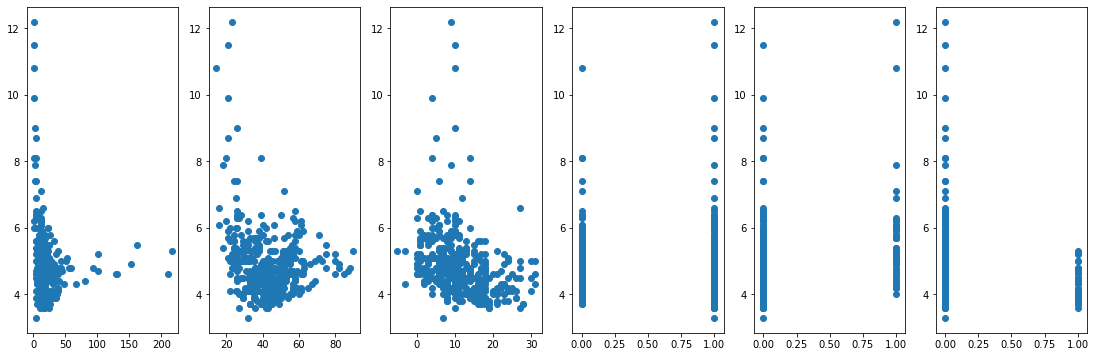

In [12]:
plt.figure(figsize=(19,6))

plt.subplot(161)
plt.scatter(dataset_x['distance'],dataset_y)
plt.subplot(162)
plt.scatter(dataset_x['speed'],dataset_y)
plt.subplot(163)
plt.scatter(dataset_x['temp_outside'],dataset_y)
plt.subplot(164)
plt.scatter(dataset_x['gas_type'],dataset_y)
plt.subplot(165)
plt.scatter(dataset_x['rain'],dataset_y)
plt.subplot(166)
plt.scatter(dataset_x['sun'],dataset_y)


plt.show()

In [13]:
dataset_x = (dataset_x - np.min(dataset_x)) / (np.max(dataset_x) - np.min(dataset_x))

In [14]:
x_train, x_test, y_train, y_test = train_test_split(dataset_x, dataset_y, test_size= 0.2, random_state= 42)

In [23]:
x_train.shape

(310, 6)

In [24]:
x_test.shape

(78, 6)

In [25]:
y_train.shape

(310,)

In [26]:
y_test.shape

(78,)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
Model = LinearRegression()

In [18]:
Model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
#To retrieve the intercept:
print(Model.intercept_)

#For retrieving the slope:
print(Model.coef_)

5.970327765973383
[ 0.3429229  -1.43542244 -1.25199208 -0.04095511  0.66091993 -0.20902697]


In [20]:
y_pred = Model.predict(x_test)

In [21]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

Actual  Predicted
0      5.1   5.975973
1      4.0   4.191514
2      4.6   4.514403
3      4.0   4.615925
4      5.9   5.987960
..     ...        ...
73     3.6   4.570452
74     3.8   4.738348
75     4.3   4.378353
76     4.3   5.635282
77     5.0   4.747225

[78 rows x 2 columns]

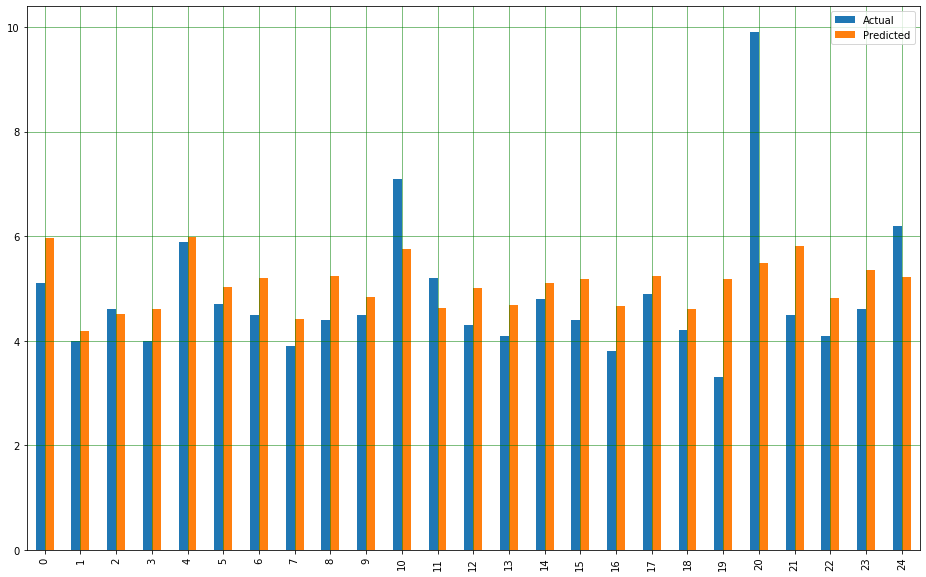

In [30]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [28]:
from sklearn import metrics

In [29]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.7309626842679305
Mean Squared Error: 1.2565262554606387
Root Mean Squared Error: 1.1209488192868748
